In [1]:
from plato.environment import Environment

In [2]:
config = {
  "whites":{
    "params":{
    "n_white_infantry":12,
    "n_white_vehicle":2,
    "n_white_drone":1},
    "init":"SE"
  },

  "blacks":{
    "params":{
    "n_black_infantry":12,
    "n_black_vehicle":2,
    "n_black_drone":1},
    "init":"NW"
  }
}

In [3]:
sim = Environment(config, shape=(100,100), time_limit=100)

In [4]:
obs = sim.reset()

In [5]:
for id_,w in sim.whites.items(): print('{:13}'.format(id_), w)

HYANNIS       <plato.entity.infantry.Infantry object at 0x116f23e10>
MARYLAND      <plato.entity.infantry.Infantry object at 0x1163ba510>
SIERRA        <plato.entity.infantry.Infantry object at 0x116f2ead0>
OCEANCITY     <plato.entity.infantry.Infantry object at 0x116f345d0>
BUFFALO       <plato.entity.infantry.Infantry object at 0x116f370d0>
CALEXICO      <plato.entity.infantry.Infantry object at 0x116f37b90>
SIOUXCITY     <plato.entity.infantry.Infantry object at 0x116f3a690>
GIFFORDS      <plato.entity.infantry.Infantry object at 0x116f3b190>
AURORA        <plato.entity.infantry.Infantry object at 0x116f3bc50>
BOUGANSVILLE  <plato.entity.infantry.Infantry object at 0x116f3c750>
TYPHOON       <plato.entity.infantry.Infantry object at 0x116f3fd50>
THESULLIVANS  <plato.entity.infantry.Infantry object at 0x116f3fd90>
HONOLULU      <plato.entity.vehicle.Vehicle object at 0x116f3fd10>
CAIRO         <plato.entity.vehicle.Vehicle object at 0x116c87510>
ZERO          <plato.entity.drone.Dron

In [6]:
for id_,w in sim.blacks.items(): print('{:13}'.format(id_), w)

unknown_0     <plato.entity.infantry.Infantry object at 0x116f41390>
unknown_1     <plato.entity.infantry.Infantry object at 0x116f413d0>
unknown_2     <plato.entity.infantry.Infantry object at 0x116f41e90>
unknown_3     <plato.entity.infantry.Infantry object at 0x116f48990>
unknown_4     <plato.entity.infantry.Infantry object at 0x116f49490>
unknown_5     <plato.entity.infantry.Infantry object at 0x116f49f50>
unknown_6     <plato.entity.infantry.Infantry object at 0x116f4ba50>
unknown_7     <plato.entity.infantry.Infantry object at 0x116f4c550>
unknown_8     <plato.entity.infantry.Infantry object at 0x116f4d050>
unknown_9     <plato.entity.infantry.Infantry object at 0x116f4db10>
unknown_10    <plato.entity.infantry.Infantry object at 0x116f52150>
unknown_11    <plato.entity.infantry.Infantry object at 0x116f52190>
unknown_12    <plato.entity.vehicle.Vehicle object at 0x116f4f610>
unknown_13    <plato.entity.vehicle.Vehicle object at 0x116f52110>
unknown_14    <plato.entity.drone.Dron

In [7]:
import random
from plato.objective.spatiotemporal.engage_objective import EngageObjective
target = random.choice(list(sim.blacks.values()))
spatiotemporal_obj = EngageObjective(interval=[35,70], target=target, radius=10)
print('{:13}'.format(target.id), target)

unknown_10    <plato.entity.infantry.Infantry object at 0x116f52150>


In [8]:
from plato.objective.temporal.control_objective import ControlObjective
temporal_obj = ControlObjective(interval=[49,84], area={'xy':[20,70],'radius':4})

In [9]:
from plato.objective.spatial.capture_objective import CaptureObjective
spatial_obj = CaptureObjective({'xy':[60,35],'radius':7})

In [10]:
sim.objectives = [spatial_obj, temporal_obj, spatiotemporal_obj]

In [11]:
minimap = sim.observation(sim.whites, negative=None)
minimap.shape

(25, 100, 100)

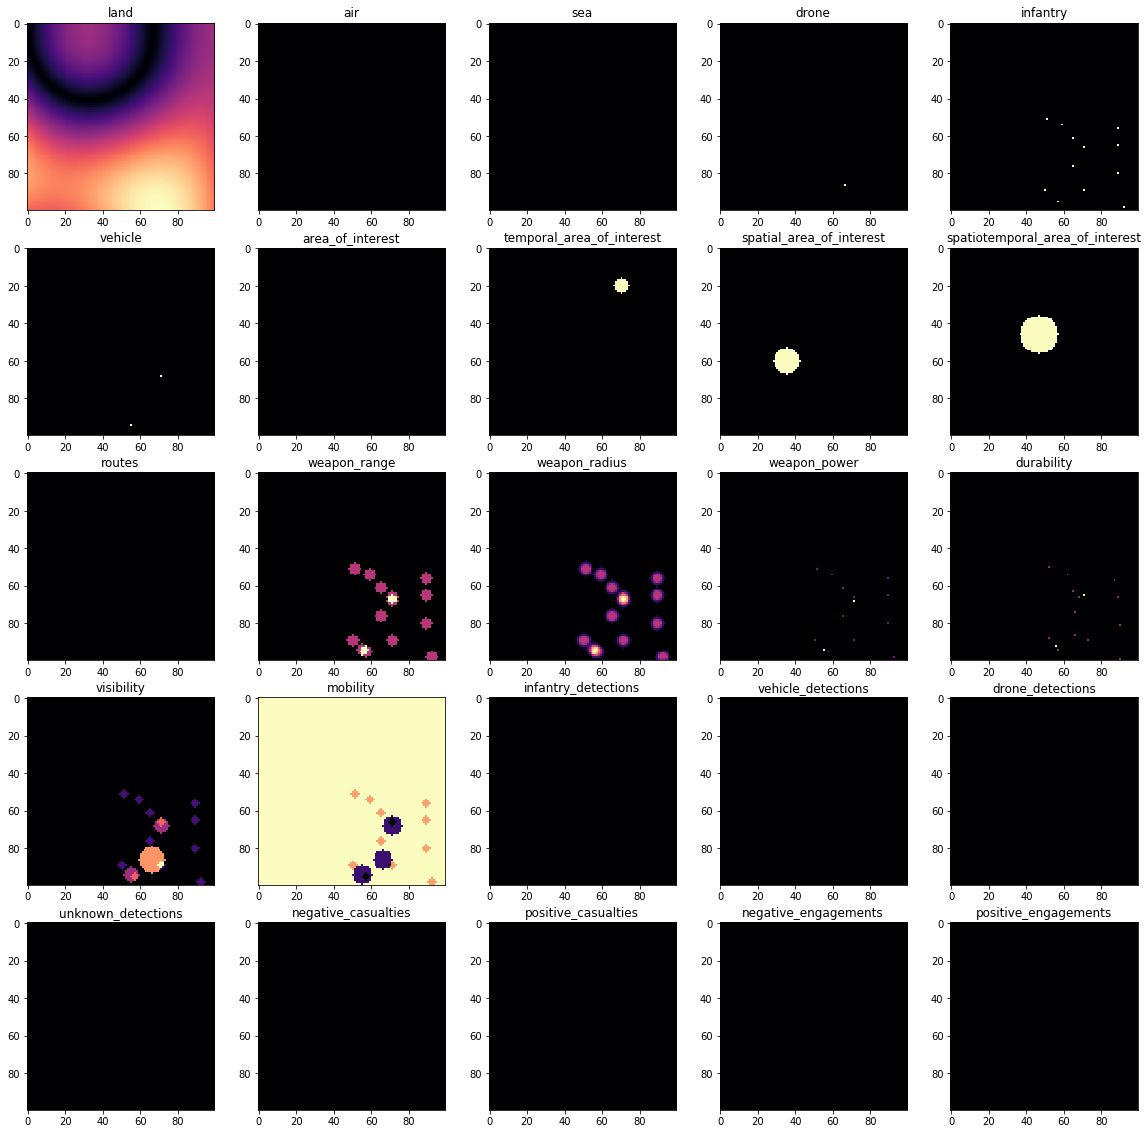

In [12]:
import numpy as np, matplotlib.pyplot as mp
from plato.features import global_features
fig,ax = mp.subplots(5,5, figsize=(20,20))
for itr,(name,feat) in enumerate(zip(global_features, minimap)):
    i,j = np.unravel_index(itr,(5,5))
    ax[i,j].set_title(name)
    ax[i,j].imshow(feat, cmap='magma')
mp.show()

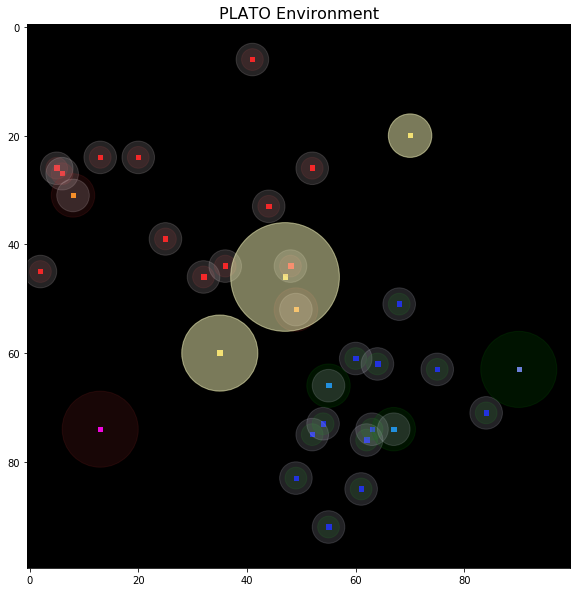

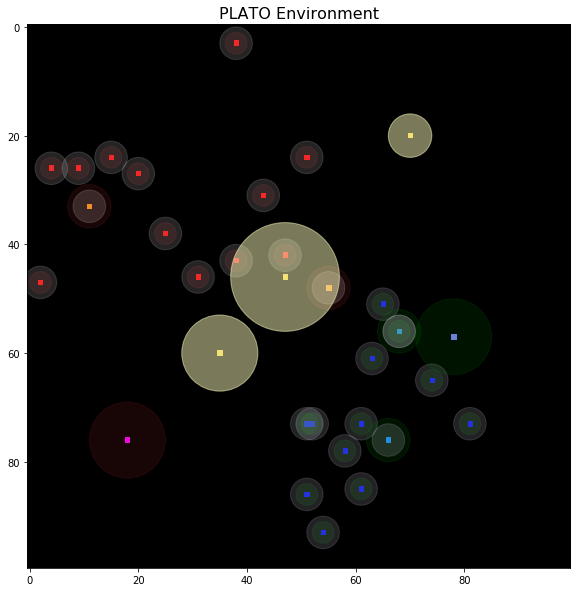

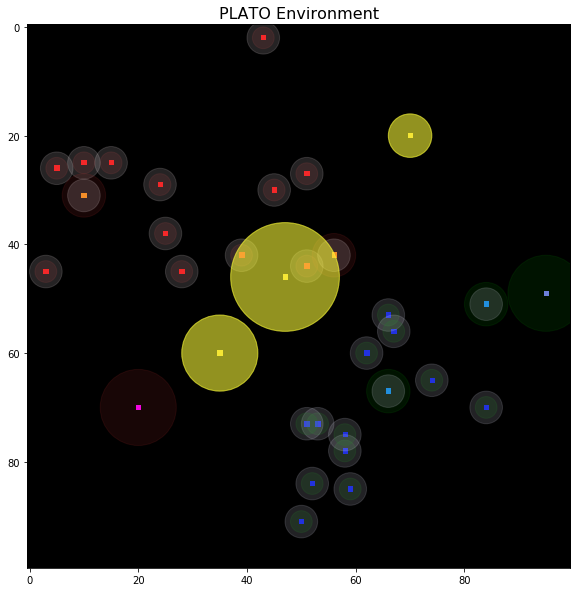

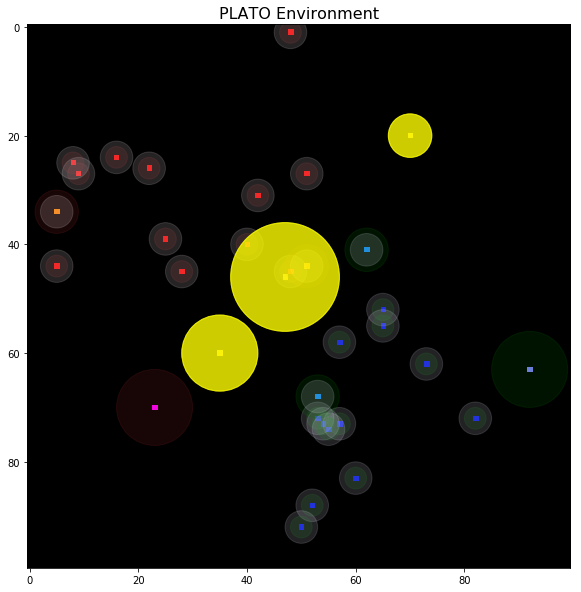

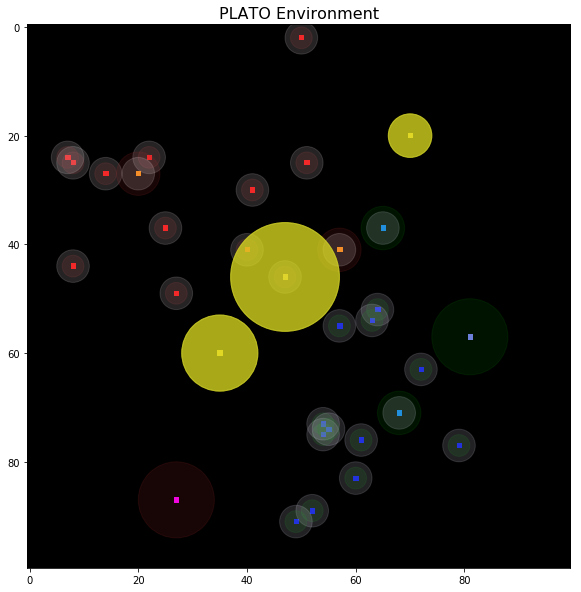

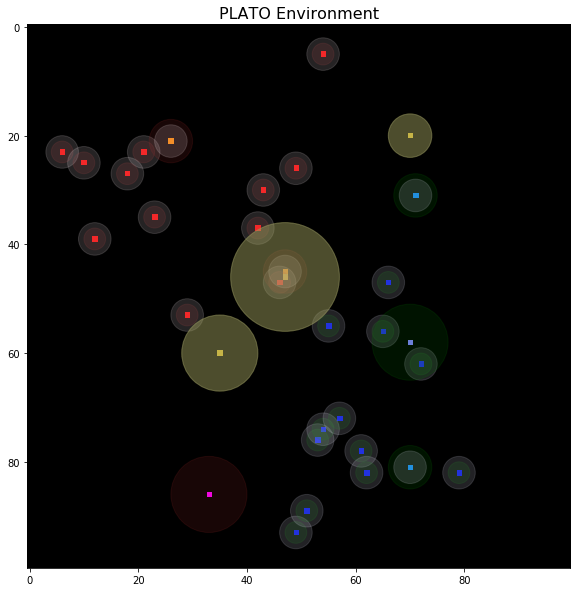

Black Kills:
White Kills:

Sparse Reward: 0


In [13]:
import tqdm
sim.reset()
bar = tqdm.tqdm_notebook(total=sim.time_limit)

terminal = False
while not terminal:
    whites = {id:ent.random_action() for id,ent in sim.whites.items() if ent.operational}
    blacks = {id:ent.random_action() for id,ent in sim.blacks.items() if ent.operational}
    
    sprime, reward, terminal, metadata = sim.step(whites, blacks)
    state = sprime
    bar.update(1)
    
    if sim.timer % 16 == 0: sim.render()
           
print('Black Kills:')
for ent in metadata['positive_casualties']: print('\t',ent.id,ent)
print('White Kills:')
for ent in metadata['negative_casualties']: print('\t',ent.id,ent)

print('\nSparse Reward:', reward)